### **Libraries**

In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as stats

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, validation_curve

%matplotlib inline
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Take Breast Cancer Wisconsin Dataset**

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df = pd.DataFrame(cancer_data.data)
df.columns = cancer_data.feature_names
df["diagnosis"] = cancer_data.target

In [4]:
pd.set_option("display.max_columns", df.shape[1])

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

In [7]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

### **Perform Univariate analysis w.r.t to target labels ( M: Malignant, B:Benign) and analysis the distribution of data across both the - labels**

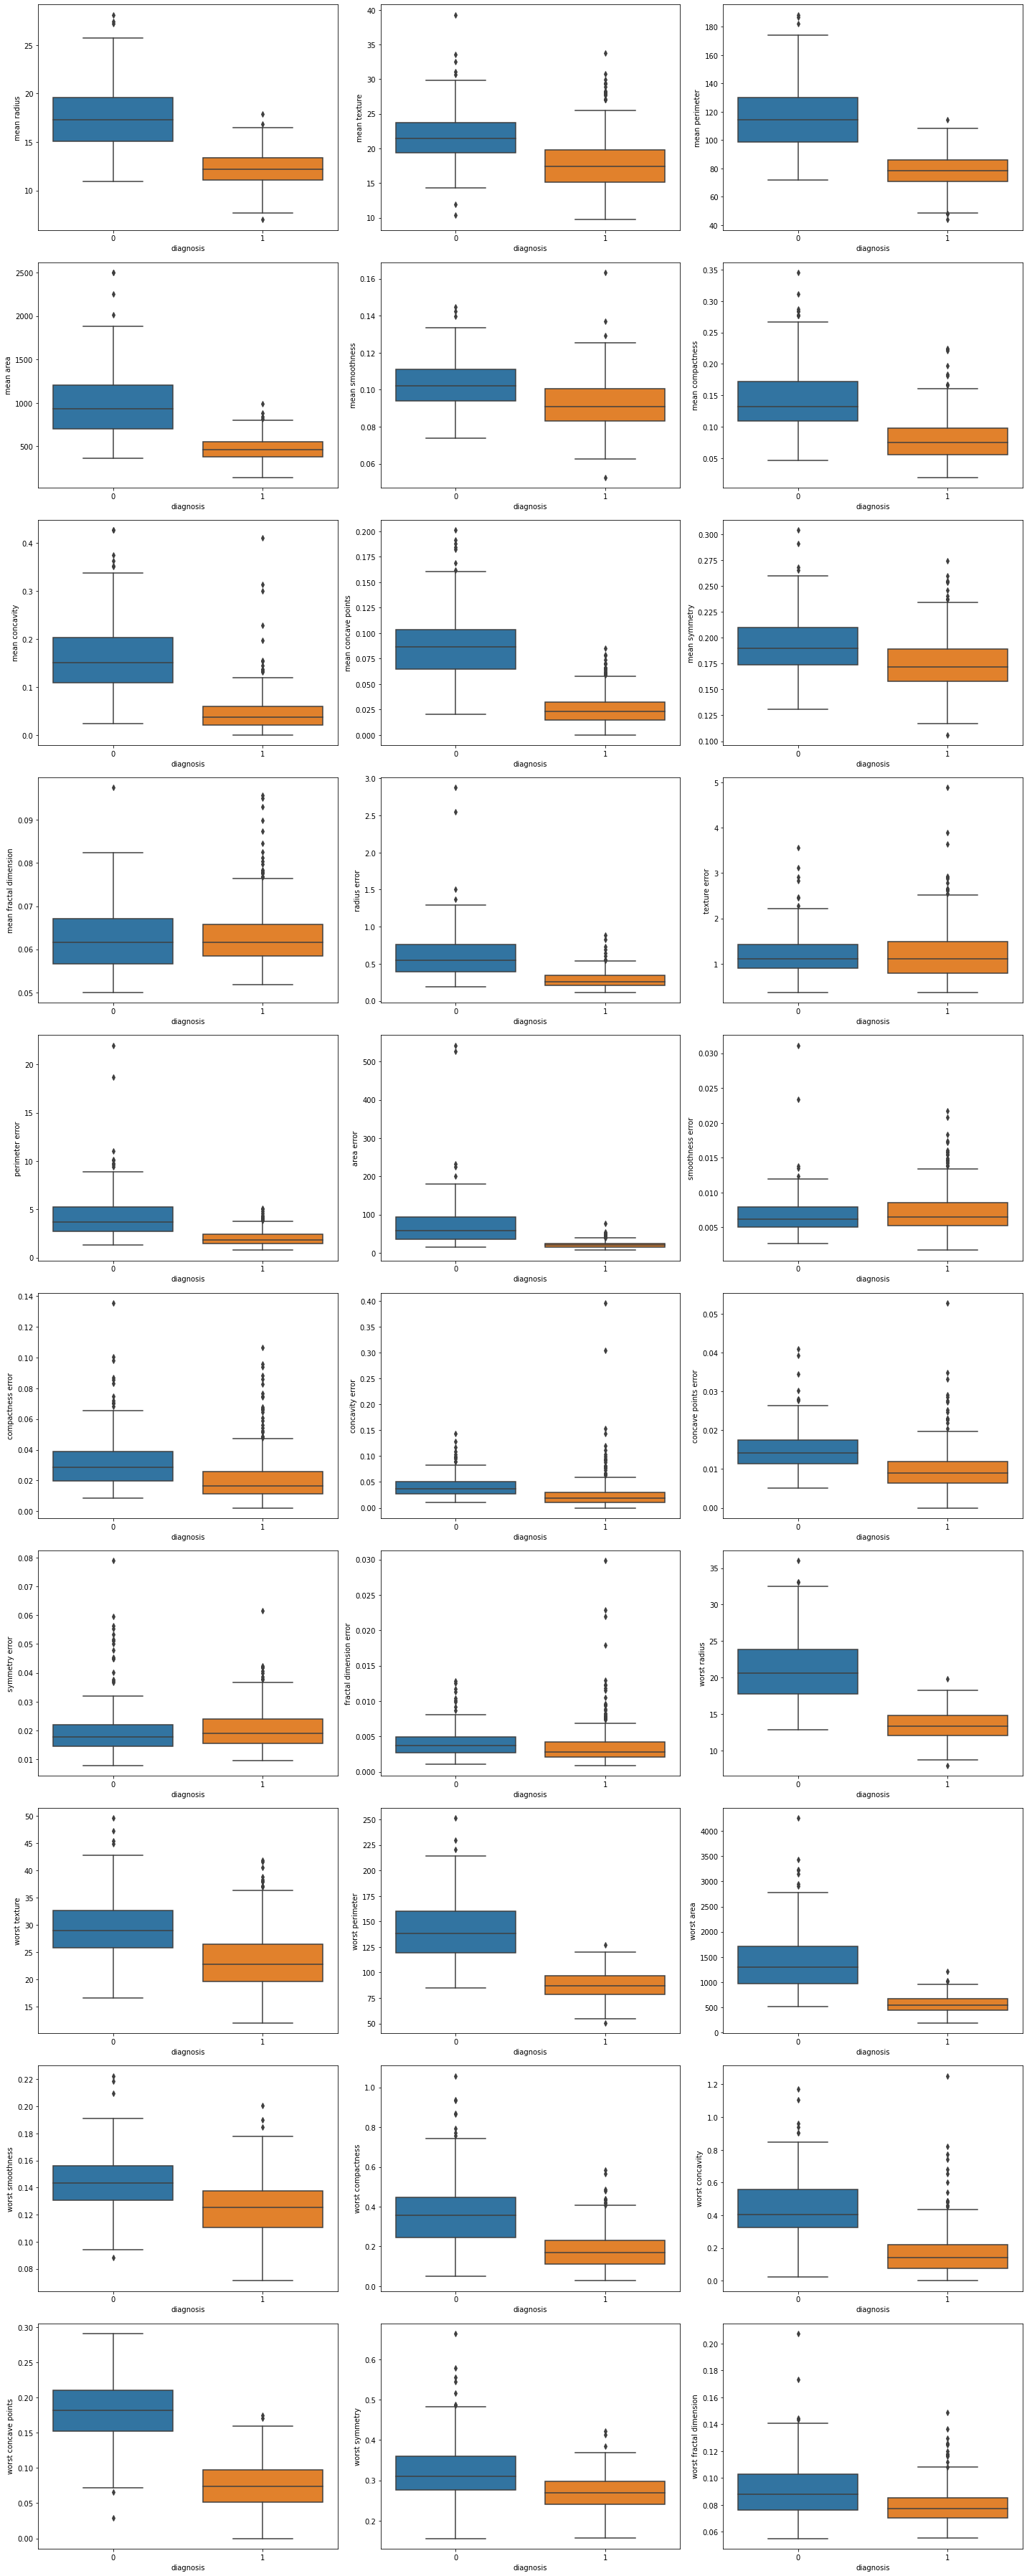

In [10]:
X = df.drop("diagnosis", axis=1)
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 50))
index = 0
ax = ax.flatten()
for key, val in X.items():
    sns.boxplot(x=df["diagnosis"], y=key, data=X, ax=ax[index])
    index += 1
plt.tight_layout()

### **Perform Bi-variate analysis on atleast 5-6 features**

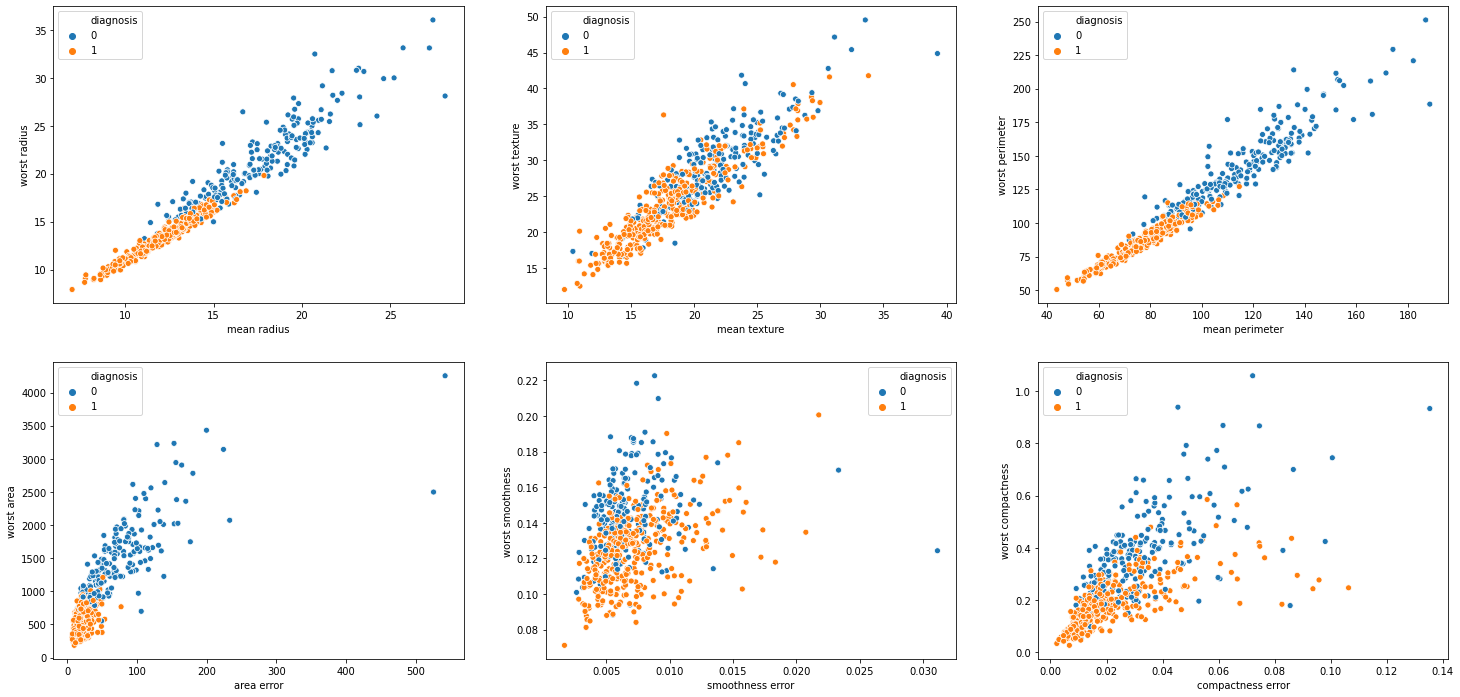

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(25, 12), sharex=False)
ax = ax.flatten()
sns.scatterplot(df["mean radius"], df["worst radius"], hue=df["diagnosis"], ax=ax[0])
sns.scatterplot(df["mean texture"], df["worst texture"], hue=df["diagnosis"], ax=ax[1])
sns.scatterplot(df["mean perimeter"], df["worst perimeter"], hue=df["diagnosis"], ax=ax[2])
sns.scatterplot(df["area error"], df["worst area"], hue=df["diagnosis"], ax=ax[3])
sns.scatterplot(df["smoothness error"], df["worst smoothness"], hue=df["diagnosis"], ax=ax[4])
sns.scatterplot(df["compactness error"], df["worst compactness"], hue=df["diagnosis"], ax=ax[5])
plt.show()

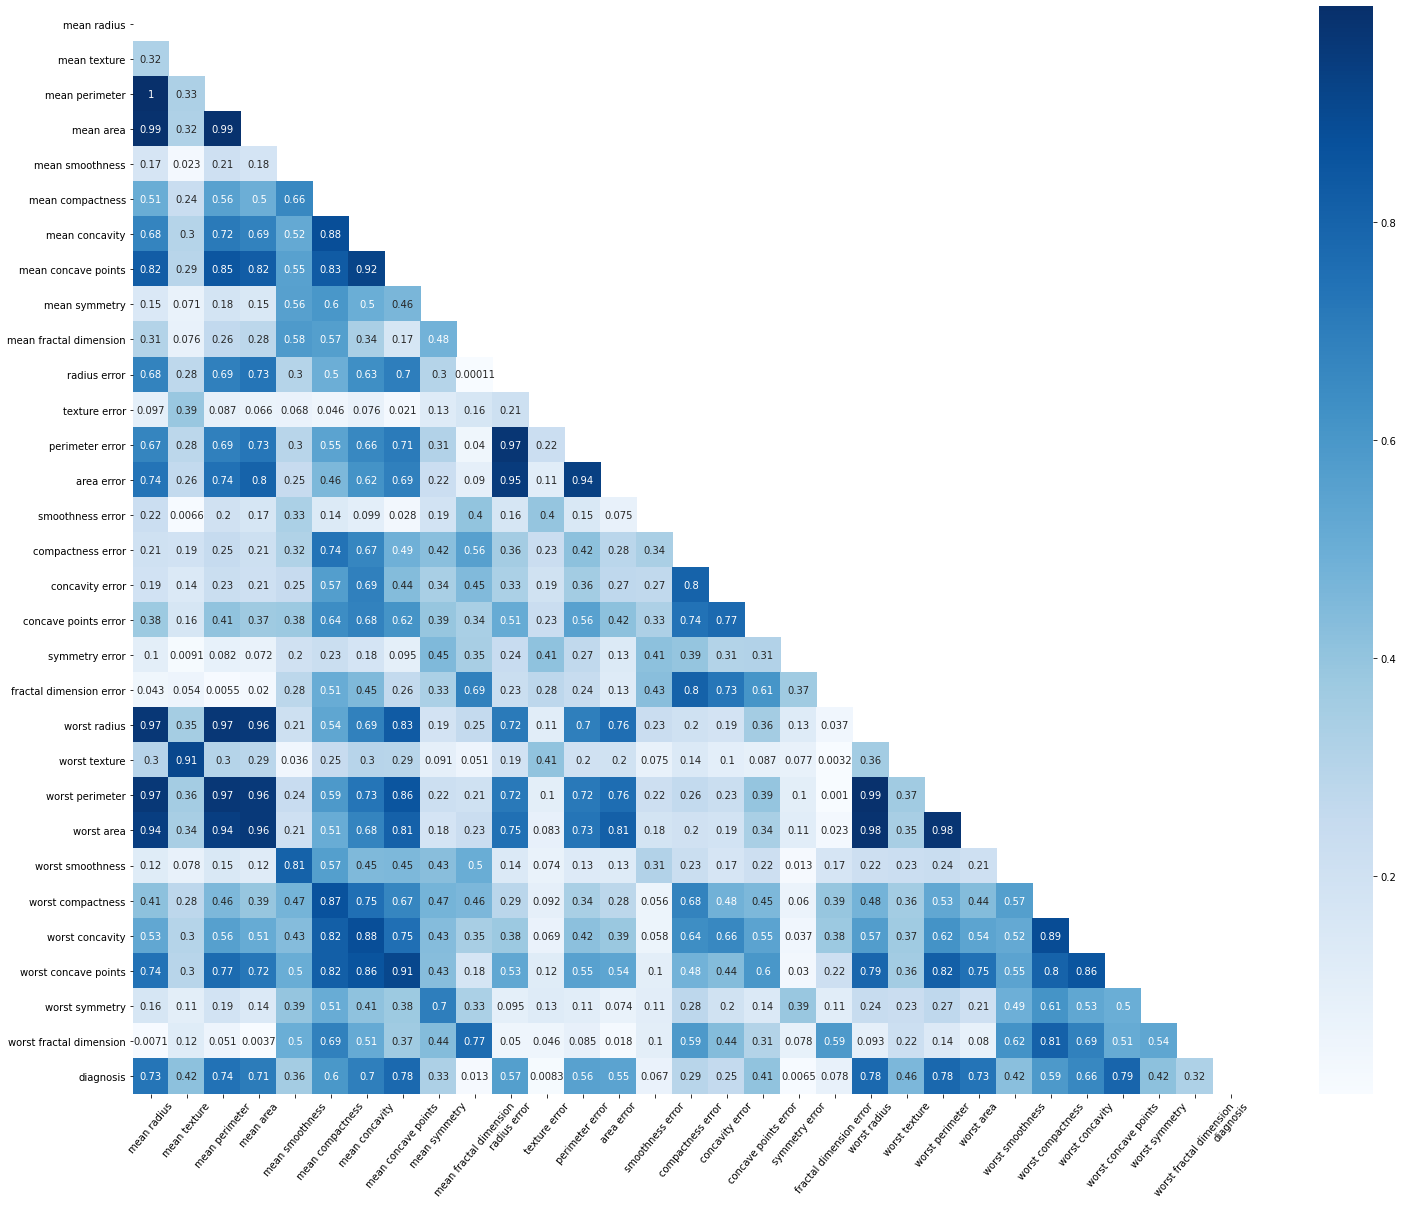

In [12]:
df_corr = df.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(
  df_corr,
  cmap="Blues",
  mask=mask,
  xticklabels=df_corr.columns.values,
  yticklabels=df_corr.columns.values,
  annot=True,
  ax=ax
)
ax.set_xticklabels(df.columns, rotation=50)
plt.show()

### **Perform Feature Engineering, atleast 2-3 features**

Removing all columns with a correlation greater than 0.9

In [13]:
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

red_col = df.columns[columns]
red_df = df[red_col]

In [14]:
red_df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0


In [15]:
# #Ignored Cause dataset is already in binary
# #Encoding categorical data values
# from sklearn.preprocessing import LabelEncoder
# labelencoder_Y = LabelEncoder()
# Y = labelencoder_Y.fit_transform(Y)

### **Check for the p-value in features**



In [16]:
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

In [17]:
def backward_elimination(inp, out, cols, sig_level=0.05):
  loop_len = len(inp[0])
  for i in range(0, loop_len):
    ols_regressor = sm.OLS(out, inp).fit()
    max_var = max(ols_regressor.pvalues).astype(float)
    if max_var > sig_level:
      for j in range(0, loop_len - i):
        if (ols_regressor.pvalues[j].astype(float) == max_var):
          inp = np.delete(inp, j, 1)
          cols = np.delete(cols, j)
  print(ols_regressor.summary())
  return cols

selected_cols = backward_elimination(X.values, Y.values, df.columns)
print(selected_cols)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              358.4
Date:                Sun, 02 Aug 2020   Prob (F-statistic):                   1.53e-273
Time:                        11:25:52   Log-Likelihood:                        -0.32309
No. Observations:                 569   AIC:                                      30.65
Df Residuals:                     554   BIC:                                      95.80
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
mod_df = df[selected_cols]
mod_X = mod_df.drop("diagnosis", axis=1)
mod_Y = mod_df["diagnosis"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(mod_X, mod_Y, test_size = 0.25, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(426, 15)
(143, 15)
(426,)
(143,)


### **Normalize features using relevant scaling techniques**

In [20]:
cols = X_train.columns

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

### **In Logistic Regression try different cutoffs and do ROC, AUC, manually. Also, apply RFE get the best 5 features and plot it.**

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Y_pred = log_reg.predict(X_test)

In [25]:
# Accuracy = No. of correct predictions / Total Number of predictions made
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix: \n{cm}")

Confusion Matrix: 
[[52  4]
 [ 0 87]]


In [26]:
rfe = RFE(log_reg, 5)
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('mean radius', False, 8),
 ('mean area', False, 6),
 ('mean concave points', True, 1),
 ('mean fractal dimension', False, 11),
 ('smoothness error', False, 7),
 ('compactness error', False, 4),
 ('concavity error', False, 10),
 ('concave points error', False, 2),
 ('fractal dimension error', True, 1),
 ('worst radius', True, 1),
 ('worst texture', True, 1),
 ('worst area', True, 1),
 ('worst concavity', False, 5),
 ('worst symmetry', False, 9),
 ('worst fractal dimension', False, 3)]

In [27]:
rfe_cols = X_train.columns[rfe.support_]

In [28]:
log_reg_rfe = LogisticRegression()
log_reg_rfe.fit(X_train[rfe_cols], Y_train)
Y_train_rfe = log_reg_rfe.predict(X_train[rfe_cols])

In [29]:
confusion_matrix(Y_train, Y_train_rfe)

array([[148,   8],
       [  5, 265]])

In [30]:
Y_train_proba = log_reg_rfe.predict_proba(X_train[rfe_cols])

In [31]:
param_df = pd.DataFrame({"Actual": Y_train, "Probability": Y_train_proba[:,1], "Predicted": Y_train_rfe})
param_df.head()

,Actual,Probability,Predicted
111,1,0.872439,1
523,1,0.915887,1
547,1,0.999139,1
41,0,0.383473,0
91,0,0.142408,0


In [32]:
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    param_df[i]= param_df["Probability"].map(lambda x: 1 if x > i else 0)

param_df.head()

,Actual,Probability,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
111,1,0.872439,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
523,1,0.915887,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
547,1,0.999139,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
41,0,0.383473,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
91,0,0.142408,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
cutoff_df = pd.DataFrame(columns = ["prob", "accuracy", "sensi", "speci"])

num = [float(x)/20 for x in range(20)]
for i in num:
    conf_mat = confusion_matrix(param_df["Actual"], param_df[i])
    total = sum(sum(conf_mat))
    accuracy = (conf_mat[0, 0] + conf_mat[1, 1]) / total
    
    speci = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    sensi = conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.633803  1.000000  0.000000
0.05  0.05  0.896714  1.000000  0.717949
0.10  0.10  0.917840  0.996296  0.782051
0.15  0.15  0.936620  0.996296  0.833333
0.20  0.20  0.941315  0.996296  0.846154
0.25  0.25  0.946009  0.996296  0.858974
0.30  0.30  0.955399  0.996296  0.884615
0.35  0.35  0.964789  0.996296  0.910256
0.40  0.40  0.969484  0.992593  0.929487
0.45  0.45  0.976526  0.992593  0.948718
0.50  0.50  0.969484  0.981481  0.948718
0.55  0.55  0.969484  0.977778  0.955128
0.60  0.60  0.969484  0.974074  0.961538
0.65  0.65  0.962441  0.959259  0.967949
0.70  0.70  0.953052  0.944444  0.967949
0.75  0.75  0.946009  0.933333  0.967949
0.80  0.80  0.948357  0.933333  0.974359
0.85  0.85  0.936620  0.907407  0.987179
0.90  0.90  0.899061  0.848148  0.987179
0.95  0.95  0.847418  0.766667  0.987179


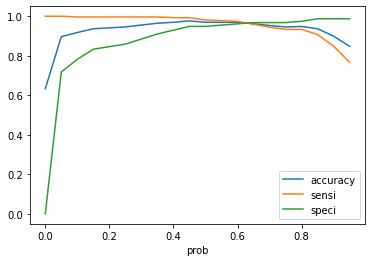

In [34]:
cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])
plt.show()

In [35]:
param_df["final_prediction"] = param_df["Probability"].map(lambda x: 1 if x > 0.6 else 0)

In [36]:
confusion_matrix(param_df["Actual"], param_df["final_prediction"])

array([[150,   6],
       [  7, 263]])

In [37]:
def draw_roc(actual, probability):
    fpr, tpr, thresholds = roc_curve(actual, probability, drop_intermediate = False )
    auc_score = roc_auc_score(actual, probability)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

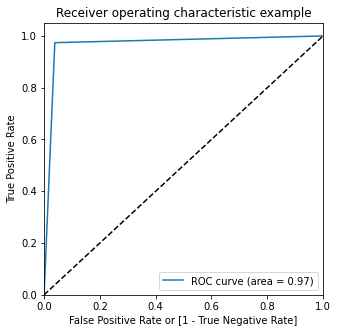

In [38]:
draw_roc(param_df['Actual'], param_df['final_prediction'])

In [39]:
Y_test_pred = log_reg_rfe.predict(X_test[rfe_cols])

In [40]:
Y_test_proba = log_reg_rfe.predict_proba(X_test[rfe_cols])

In [41]:
test_df = pd.DataFrame({"Actual": Y_test, "Probability": Y_test_proba[:,1], "Predicted": Y_test_pred})
test_df.head()

,Actual,Probability,Predicted
400,0,0.000245,0
225,1,0.925568,1
321,0,0.003059,0
173,1,0.999587,1
506,1,0.994826,1


In [42]:
test_df["final_prediction"] = test_df["Probability"].map(lambda x: 1 if x > 0.6 else 0)

In [43]:
confusion_matrix(test_df["Actual"], test_df["final_prediction"])

array([[52,  4],
       [ 3, 84]])

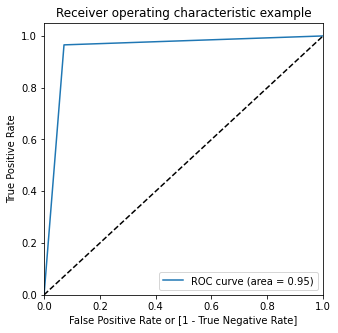

In [44]:
draw_roc(test_df["Actual"], test_df["final_prediction"])

### **Perform Fine-tuning to the "C" parameter.**

In [45]:
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

pipe_lr = Pipeline([
  ('scl', StandardScaler()),
  ('clf', LogisticRegression())
])

pipe_lr.fit(X_train, Y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, Y_test))
Y_pred_tuned = pipe_lr.predict(X_test)

Test Accuracy: 0.972
